# <p style="text-align: center;">TP - Complexité</p>

Alexandre ECALLE - 2023


L’objectif de cette séance est d’effectuer une comparaison des trois algorithmes utilisés pour calculer la suite de Fibonacci afin de voir si la complexité théorique des algorithmes garde son sens en pratique.

Vous devez répondre aux questions suivantes en programmant les fonctions demandées ou en indiquant les complexités des algorithmes.

In [60]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math

## Partie 1 - programmation des trois algorithmes

### Algorithme exponentiel

In [4]:
# COMPLETER LE CODE

def fibo1(n):
    if n <= 2:
        return n
    else:
        return fibo1(n-1) + fibo1(n-2)

In [5]:
print(fibo1(5),fibo1(10),fibo1(30),fibo1(40)) # 5 55 832040 102334155

8 89 1346269 165580141


### Algorithme linéaire

In [6]:
# COMPLETER LE CODE
def fibo2(n):
    a = 1
    b = 1
    for i in range(2 , n+1):
        b = a+b
        a = b-a
    return b

In [9]:
print(fibo2(5),fibo2(10),fibo2(30),fibo2(40)) # 5 55 832040 102334155

8 89 1346269 165580141


### Algorithme logarithmique

In [23]:
# COMPLETER LE CODE produit de 2 matrices 2x2
def product(x,y):
    x = np.array(x)
    y = np.array(y)
    return np.dot(x,y)
    

In [24]:
M = [[1,1],[1,0]]
product(M,M) # [[2, 1], [1, 1]]

array([[2, 1],
       [1, 1]])

In [26]:
# COMPLETER LE CODE
def power(x,n):
    if n == 1:
        return x
    elif n%2 == 0:
        return power(product(x,x),n/2)
    else:
        return product(x,power(product(x,x),(n-1)/2))


In [27]:
power(M,7) # [[21, 13], [13, 8]]

array([[21, 13],
       [13,  8]])

In [32]:
# COMPLETER LE CODE
def fibo3(n):
    if n <= 2:
        return 1
    A = power([[1,1],[1,0]], n-1)
    return A[0,0]

In [33]:
print(fibo3(5),fibo3(10),fibo3(30),fibo3(40)) # 5 55 832040 102334155

5 55 832040 102334155


## Comparaison des algorithmes

La fonction time.clock permet de mesurer le temps d'éxécution d'une fonction, la fonction plot permet de tracer une courbe, les fonctions smilogx et semilogy permettent de tracer en échelle logarithmique, la fonction subplot permet d'aligner des courbes. 

In [40]:
t = time.perf_counter()
fibo1(30)
print(time.perf_counter()-t)

0.10932920000050217


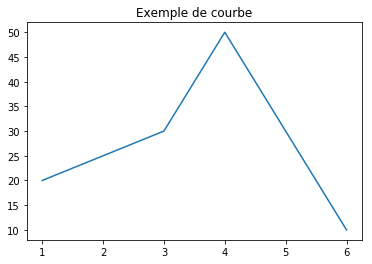

In [16]:
plt.plot(np.array([1, 3, 4, 6]),np.array([20, 30, 50, 10]))
plt.title("Exemple de courbe")
plt.show()

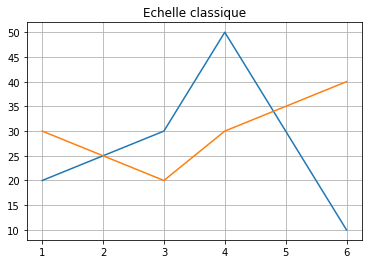

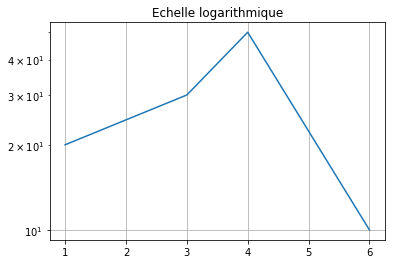

In [19]:
plt.plot(np.array([1, 3, 4, 6]),np.array([20, 30, 50, 10]))
plt.plot(np.array([1, 3, 4, 6]),np.array([30, 20, 30, 40]))
plt.grid(True)
plt.title("Echelle classique")
plt.show()
plt.semilogy(np.array([1, 3, 4, 6]),np.array([20, 30, 50, 10]))
plt.title("Echelle logarithmique")
plt.grid(True)
plt.show()

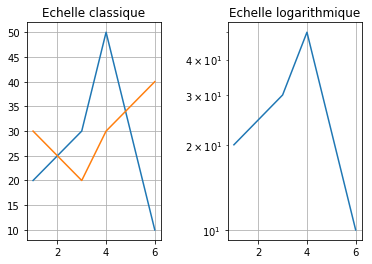

In [20]:
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.6)
plt.subplot(121)
plt.plot(np.array([1, 3, 4, 6]),np.array([20, 30, 50, 10]))
plt.plot(np.array([1, 3, 4, 6]),np.array([30, 20, 30, 40]))
plt.title("Echelle classique")
plt.grid(True)
plt.subplot(122)
plt.semilogy(np.array([1, 3, 4, 6]),np.array([20, 30, 50, 10]))
plt.title("Echelle logarithmique")
plt.grid(True)


Ecrire le code nécessaire pour tracer les courbes du temps d'exécution en fonction de l'entier en entrée pour fibo1, fibo2 et fibo3.

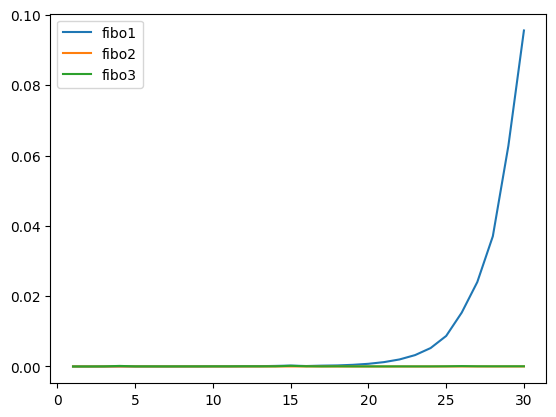

In [54]:
# COMPLETER LE CODE  pour affichier le temps d'execution de fibo1, fibo2 et fibo3 en fonction de l'entier d'entrée avec un variable n en entrée et tout afficher sur le meem graphe

def trace (n):
    x = np.arange(1,n+1)
    y1 = np.zeros(n)
    y2 = np.zeros(n)
    y3 = np.zeros(n)
    for i in range(1,n+1):
        t = time.perf_counter()
        fibo1(i)
        y1[i-1] = time.perf_counter()-t
        t = time.perf_counter()
        fibo2(i)
        y2[i-1] = time.perf_counter()-t
        t = time.perf_counter()
        fibo3(i)
        y3[i-1] = time.perf_counter()-t
    plt.plot(x,y1,label='fibo1')
    plt.plot(x,y2,label='fibo2')
    plt.plot(x,y3,label='fibo3')
    plt.legend()
    plt.show()

    
trace(30)



    



In [ ]:
Ajouter les courbes de la complexité théorique de fibo1, fibo2 et fibo3.

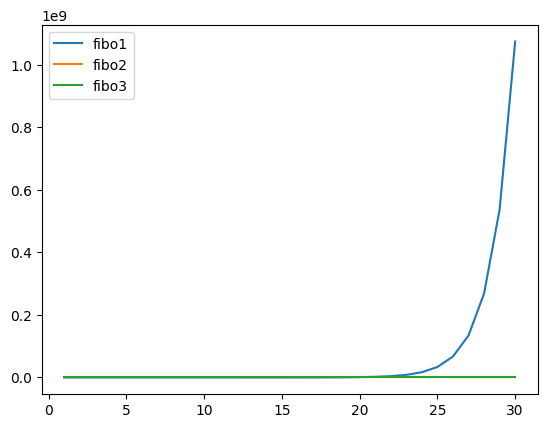

In [62]:
# COMPLETER LE CODE ajouter les courbes de complexité théorique de fibo1, fibo2 et fibo3
def trace_theory_complexity(n):
    x = np.arange(1,n+1)
    y1 = np.zeros(n)
    y2 = np.zeros(n)
    y3 = np.zeros(n)
    for i in range(1,n+1):
        y1[i-1] = math.exp2(i)
        y2[i-1] = i
        y3[i-1] = math.log2(i)
    plt.plot(x,y1,label='fibo1')
    plt.plot(x,y2,label='fibo2')
    plt.plot(x,y3,label='fibo3')
    plt.legend()
    plt.show()

trace_theory_complexity(30) 
    
    

    



On souhaite maintenant calculer tous les nombres de Fibonacci pour i allant de 1 à n sans modifier les algorithmes précédents (juste avec une boucle for). Refaites les courbes et indiquez les complexités correspondantes.
Peut-on faire mieux si on peut modifier les trois algorithmes ? Indiquez les complexités.

REPONSE :


Selon la valeur de n on décidra quel algorithme utiliser.
Par exemple dans le cas de la suite de Fibonacci, si n est petit on utilisera l'algorithme exponentiel, si n est moyen on utilisera l'algorithme linéaire et si n est grand on utilisera l'algorithme logarithmique.


